# Step 4: Import the Data.  

### Here's an example of importing the tab-delimited Texas PUDF data via Spark:

In [1]:
from pyspark.sql import SparkSession, SQLContext

# Start the Spark session
spark = SparkSession \
    .builder \
    .appName('Import Texas PUDF Data') \
    .getOrCreate() \

# Import the data into a dataframe
data_sp = spark.read.load(
    "C:\\Users\\Vikas\\PUDF_base1_1q2012_tab.txt",
    format="csv",
    sep="\t",
    header=True
)

To test the import, we can display the first five records of the first two columns:

In [2]:
data_sp.select('RECORD_ID','DISCHARGE').show(5, truncate=False)

+------------+---------+
|RECORD_ID   |DISCHARGE|
+------------+---------+
|120120107482|2012Q1   |
|120120107487|2012Q1   |
|120120107568|2012Q1   |
|120120107381|2012Q1   |
|120120107410|2012Q1   |
+------------+---------+
only showing top 5 rows



### Here's an example of importing the fixed-width NHAMCS via Python/Pandas:

In [4]:
import pandas as pd
pd.set_option('mode.chained_assignment',None)

HOME_PATH = 'C:\\Users\\Vikas\\Desktop\\Bk\\health-it\\helper_files\\'

df_helper = pd.read_csv(
    HOME_PATH + 'ED_metadata.csv',
    header=0, 
    dtype={'width': int, 'column_name': str, 'variable_type': str}
)

print(df_helper.head(n=5))

   width column_name  variable_type
0      2      VMONTH    CATEGORICAL
1      1       VDAYR    CATEGORICAL
2      4     ARRTIME  NONPREDICTIVE
3      4    WAITTIME     CONTINUOUS
4      4         LOV  NONPREDICTIVE


In [5]:
width = df_helper['width'].tolist()
col_names = df_helper['column_name'].tolist()
var_types = df_helper['variable_type'].tolist()

df_ed = pd.read_fwf(
    'C:\\Users\\Vikas\\Desktop\\Bk\\data\\ED2013\\ED2013',
    widths=width,
    header=None,
    dtype='str'  
)
df_ed.columns = col_names
print(df_ed.head(n=5))

  VMONTH VDAYR ARRTIME WAITTIME   LOV  AGE AGER AGEDAYS RESIDNCE SEX ...   \
0     01     3    0647     0033  0058  046    4     -07       01   2 ...    
1     01     3    1841     0109  0150  056    4     -07       01   2 ...    
2     01     3    1333     0084  0198  037    3     -07       01   2 ...    
3     01     3    1401     0159  0276  007    1     -07       01   1 ...    
4     01     4    1947     0114  0248  053    4     -07       01   1 ...    

  RX12V3C1 RX12V3C2 RX12V3C3 RX12V3C4 SETTYPE  YEAR   CSTRATM   CPSUM   PATWT  \
0      nan      nan      nan      nan       3  2013  20113201  100020  002945   
1      nan      nan      nan      nan       3  2013  20113201  100020  002945   
2      nan      nan      nan      nan       3  2013  20113201  100020  002945   
3      nan      nan      nan      nan       3  2013  20113201  100020  002945   
4      nan      nan      nan      nan       3  2013  20113201  100020  002945   

  EDWT  
0  nan  
1  nan  
2  nan  
3  nan  
4  na

# 5. Explore the data

### The printSchema() function in Spark displays the entire schema of your dataframe.

In [6]:
data_sp.printSchema()

root
 |-- RECORD_ID: string (nullable = true)
 |-- DISCHARGE: string (nullable = true)
 |-- THCIC_ID: string (nullable = true)
 |-- PROVIDER_NAME: string (nullable = true)
 |-- TYPE_OF_ADMISSION: string (nullable = true)
 |-- SOURCE_OF_ADMISSION: string (nullable = true)
 |-- SPEC_UNIT_1: string (nullable = true)
 |-- SPEC_UNIT_2: string (nullable = true)
 |-- SPEC_UNIT_3: string (nullable = true)
 |-- SPEC_UNIT_4: string (nullable = true)
 |-- SPEC_UNIT_5: string (nullable = true)
 |-- PAT_STATE: string (nullable = true)
 |-- PAT_ZIP: string (nullable = true)
 |-- PAT_COUNTRY: string (nullable = true)
 |-- COUNTY: string (nullable = true)
 |-- PUBLIC_HEALTH_REGION: string (nullable = true)
 |-- PAT_STATUS: string (nullable = true)
 |-- SEX_CODE: string (nullable = true)
 |-- RACE: string (nullable = true)
 |-- ETHNICITY: string (nullable = true)
 |-- ADMIT_WEEKDAY: string (nullable = true)
 |-- LENGTH_OF_STAY: string (nullable = true)
 |-- PAT_AGE: string (nullable = true)
 |-- FIRST_

### The summary() function in Spark is useful for drawing box plots.

In [11]:
data_sp.select("PAT_STATUS").summary().show()

+-------+------------------+
|summary|        PAT_STATUS|
+-------+------------------+
|  count|            745197|
|   mean| 5.391938587402613|
| stddev|13.869829055207891|
|    min|                01|
|    25%|               1.0|
|    50%|               1.0|
|    75%|               1.0|
|    max|                 `|
+-------+------------------+



### The analogous functions in pandas are info(), describe(), and boxplot().

In [12]:
df_ed.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24777 entries, 0 to 24776
Data columns (total 579 columns):
VMONTH          object
VDAYR           object
ARRTIME         object
WAITTIME        object
LOV             object
AGE             object
AGER            object
AGEDAYS         object
RESIDNCE        object
SEX             object
ETHUN           object
ETHIM           object
RACEUN          object
RACER           object
RACERETH        object
ARREMS          object
NOPAY           object
PAYPRIV         object
PAYMCARE        object
PAYMCAID        object
PAYWKCMP        object
PAYSELF         object
PAYNOCHG        object
PAYOTH          object
PAYDK           object
PAYTYPER        object
TEMPF           object
PULSE           object
RESPR           object
BPSYS           object
BPDIAS          object
POPCT           object
ONO2            object
IMMEDR          object
PAINSCALE       object
SEEN72          object
RFV1            object
RFV2            object
RFV3            

In [8]:
df_ed.describe()

,VMONTH,VDAYR,ARRTIME,WAITTIME,LOV,AGE,AGER,AGEDAYS,RESIDNCE,SEX,...,RX12V3C1,RX12V3C2,RX12V3C3,RX12V3C4,SETTYPE,YEAR,CSTRATM,CPSUM,PATWT,EDWT
count,24777,24777,24777,24777,24777,24777,24777,24777,24777,24777,...,24777,24777,24777,24777,24777,24777,24777,24777,24777,24777
unique,12,7,1441,481,1314,94,6,302,6,2,...,45,9,2,2,1,1,8,156,355,1
top,05,2,-9,-009,-009,000,3,-07,01,1,...,nan,nan,nan,nan,3,2013,40300000,000023,002945,nan
freq,2729,3941,595,3635,1576,658,7006,24119,23018,13702,...,24673,24766,24774,24774,24777,24777,7502,978,183,24777


AGE    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

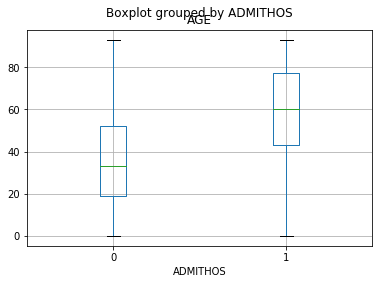

In [16]:
df_ed.loc[:,'AGE'] = df_ed.loc[:,'AGE'].apply(pd.to_numeric)

df_ed.boxplot(column='AGE', by='ADMITHOS', return_type='axes')

# 6. Preprocess the data

### Typical preprocessing steps include:

### Finalizing the target variable:

In [ ]:
response_cols = ['ADMITHOS','TRANOTH','TRANPSYC','OBSHOS','OBSDIS']

df_ed.loc[:, response_cols] = df_ed.loc[:, response_cols].apply(pd.to_numeric)

df_ed['ADMITTEMP'] = df_ed[response_cols].sum(axis=1)
df_ed['ADMITFINAL'] = 0
df_ed.loc[df_ed['ADMITTEMP'] >= 1, 'ADMITFINAL'] = 1

df_ed.drop(response_cols, axis=1, inplace=True)
df_ed.drop('ADMITTEMP', axis=1, inplace=True)

In [ ]:
def split_target(data, target_name):
    target = data[[target_name]]
    data.drop(target_name, axis=1, inplace=True)
    return (data, target)

X, y = split_target(df_ed, 'ADMITFINAL')

### Splitting the data into train and test sets:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1234
)

### Feature engineering:

In [ ]:
def is_winter(vmonth):
    if vmonth in ['12','01','02','03']:
        return 1
    else:
        return 0
    
X_train.loc[:,'WINTER'] = df_ed.loc[:,'VMONTH'].apply(is_winter)
X_test.loc[:,'WINTER'] = df_ed.loc[:,'VMONTH'].apply(is_winter)

In [ ]:
def is_night(arrtime):
    arrtime_int = int(arrtime)
    if ((arrtime_int >= 0) & (arrtime_int < 800)):
        return 1
    elif ((arrtime_int >= 2000) & (arrtime_int < 2400)):
        return 1
    else:
        return 0
    
X_train.loc[:,'NIGHT'] = df_ed.loc[:,'ARRTIME'].apply(is_night)
X_test.loc[:,'NIGHT'] = df_ed.loc[:,'ARRTIME'].apply(is_night)

X_train.drop('ARRTIME', axis=1, inplace=True)
X_test.drop('ARRTIME', axis=1, inplace=True)

### Data imputation:

In [ ]:
def mean_impute_values(data,col):  
    temp_mean = data.loc[(data[col] != -7) & (data[col] != -9), col].mean()
    data.loc[(data[col] == -7) | (data[col] == -9), col] = temp_mean            
    return data

X_train = mean_impute_values(X_train,'WAITTIME')
X_test = mean_impute_values(X_test,'WAITTIME')

### Type conversion to numeric (see example above):

### Converting clinical codes to features:

In [ ]:
rfv_codes_path = HOME_PATH + 'RFV_CODES.csv'

rfv_codes = pd.read_csv(rfv_codes_path,header=0,dtype='str')

In [ ]:
from re import sub

def add_rfv_column(data,code,desc,rfv_columns):
    column_name = 'rfv_' + sub(" ", "_", desc)
    data[column_name] = (data[rfv_columns] == rfv_code).any(axis=1).astype('int')
    return data

rfv_columns = ['RFV1','RFV2','RFV3']
for (rfv_code,rfv_desc) in zip(
    rfv_codes['Code'].tolist(),rfv_codes['Description'].tolist()
):
    X_train = add_rfv_column(
        X_train,
        rfv_code,
        rfv_desc,
        rfv_columns
    )
    X_test = add_rfv_column(
        X_test,
        rfv_code,
        rfv_desc,
        rfv_columns      
    )
    
# Remove original RFV columns
X_train.drop(rfv_columns, axis=1, inplace=True)
X_test.drop(rfv_columns, axis=1, inplace=True)

In [ ]:
X_train.head(n=5)

# 7. Build the model

# 8. Evaluate performance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clfs_rf = [RandomForestClassifier(n_estimators=100)]

for clf in clfs_rf:
    clf.fit(X_train, y_train.ravel())
    print(type(clf))
    print('Training accuracy: ' + str(clf.score(X_train, y_train)))
    print('Validation accuracy: ' + str(clf.score(X_test, y_test)))
    
    imps = {
        'column': [X_train_cols[i] for i in range(len(X_train_cols))],
        'imp': [clf.feature_importances_[i] for i in range(len(X_train_cols))]
    }
    df_imps = pd.DataFrame(imps)
    print(df_imps.sort_values('imp', axis=0, ascending=False))

### Questions?

### Let's connect!

GitHub: https://github.com/vkumar8282 (Contains the current notebook and some others)
Blog: http://www.mlmd.io  
Amazon: https://www.amazon.com/author/vik-kumar

Book Discount Codes (Good through end of March):
eBook 40% = HAAMS40
Print Book 10% = HAMSP10
www.packtpub.com

Questions? vkumar8282@gmail.com

Thank you!

